# KC house Prediction

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

# Import supplementary visualizations code visuals.py
# import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
df = pd.read_csv('/content/drive/My Drive/data/kc_house_data.csv')
    
# Success
print("kc house dataset has {} data points with {} variables each.".format(*df.shape))

Mounted at /content/drive
kc house dataset has 21613 data points with 21 variables each.


In [ ]:
import pandas as pd
import numpy as np
import warnings

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error


warnings.filterwarnings('ignore')
%matplotlib inline
np.random.seed(42)


# import pytorch
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader, Dataset

In [ ]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

### Data Preprocessing

In [ ]:
for col in df.columns:
	if df[col].dtype == 'int64':
		df[col] = pd.to_numeric(df[col], downcast='integer')
	elif df[col].dtype == 'float64':
	    df[col] = pd.to_numeric(df[col], downcast='float')
	    
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float32
 3   bedrooms       21613 non-null  int8   
 4   bathrooms      21613 non-null  float32
 5   sqft_living    21613 non-null  int16  
 6   sqft_lot       21613 non-null  int32  
 7   floors         21613 non-null  float32
 8   waterfront     21613 non-null  int8   
 9   view           21613 non-null  int8   
 10  condition      21613 non-null  int8   
 11  grade          21613 non-null  int8   
 12  sqft_above     21613 non-null  int16  
 13  sqft_basement  21613 non-null  int16  
 14  yr_built       21613 non-null  int16  
 15  yr_renovated   21613 non-null  int16  
 16  zipcode        21613 non-null  int32  
 17  lat            21613 non-null  float32
 18  long  

### Data Visualization

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

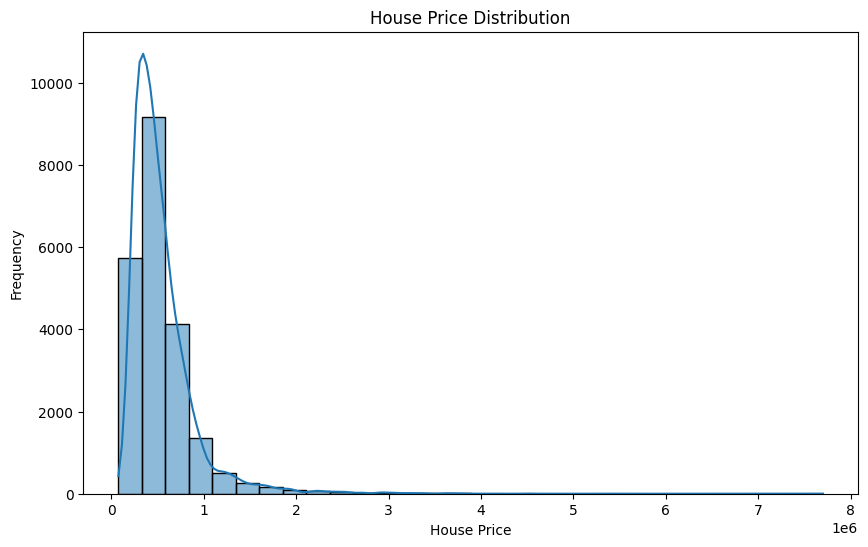

In [ ]:
# Get a summary of the dataset
print(df.describe())

# Check for missing values
print(df.isnull().sum())

# Visualize the distribution of the target variable (price)
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30)
plt.xlabel('House Price')
plt.ylabel('Frequency')
plt.title('House Price Distribution')
plt.show()

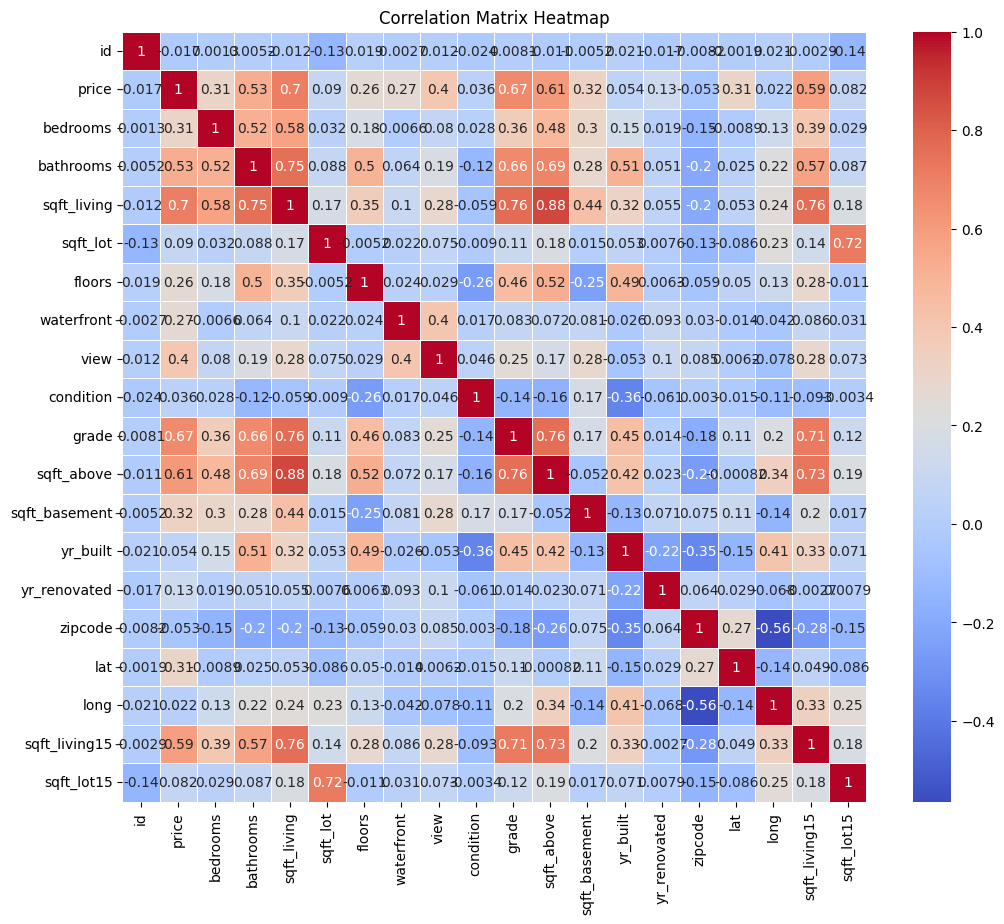

In [ ]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Features with a correlation greater than 0.5 with house price:
 price            1.000000
bathrooms        0.525138
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
Name: price, dtype: float64


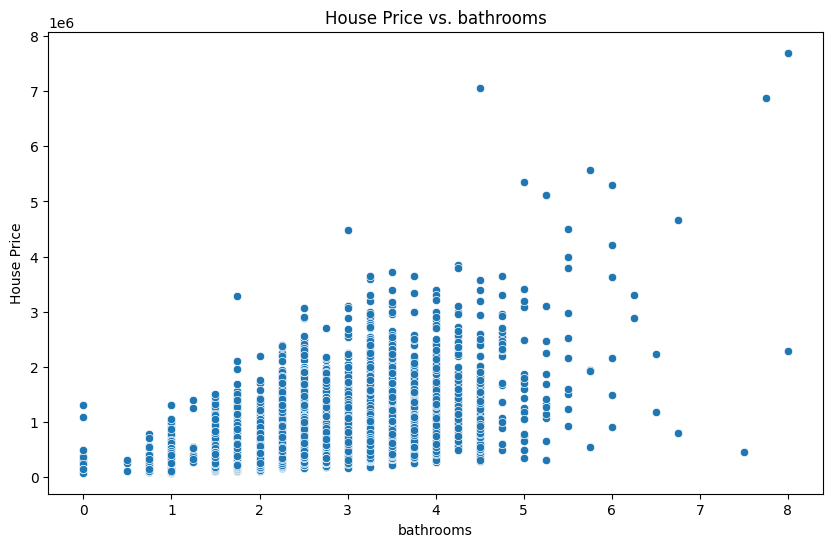

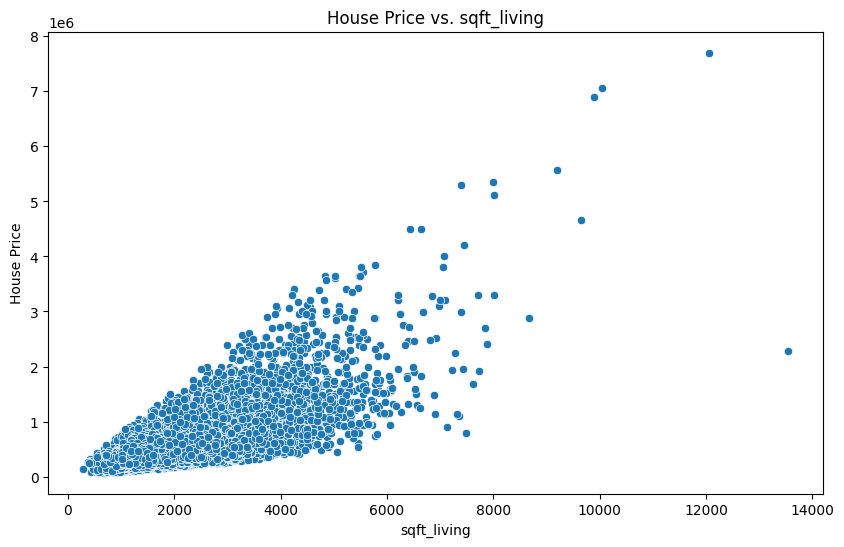

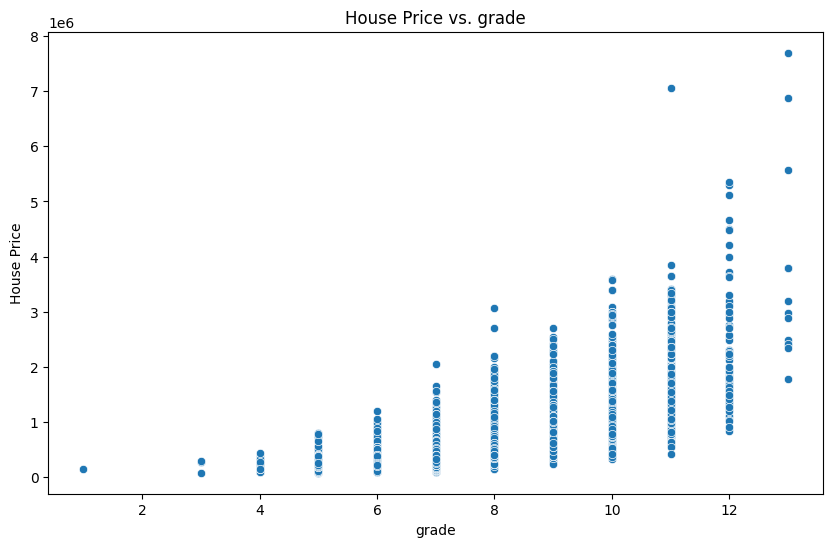

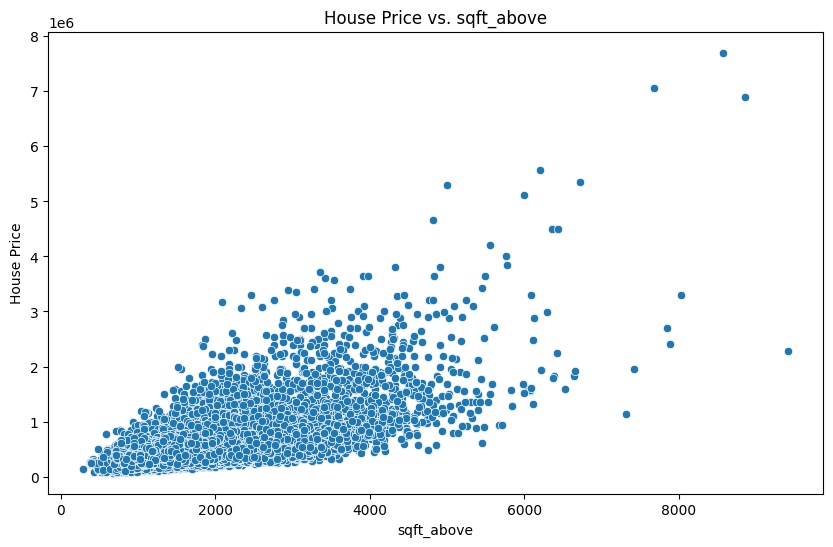

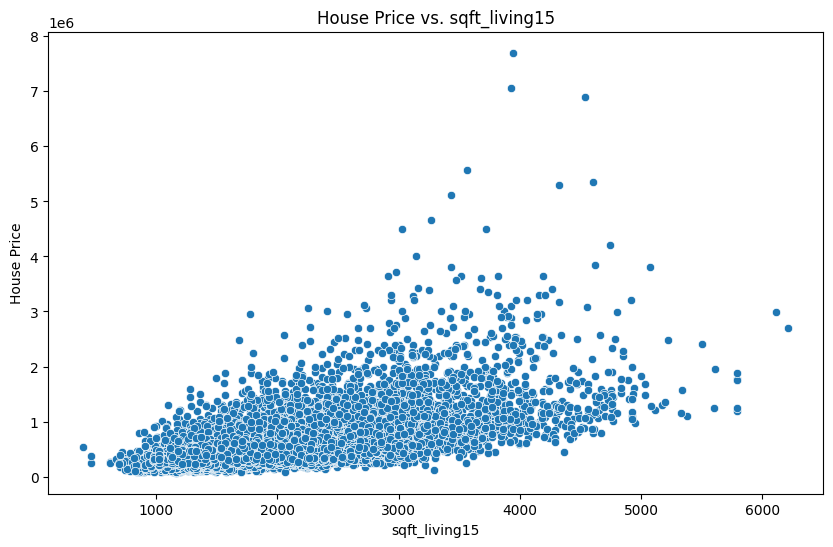

In [ ]:
# Identify features with a correlation greater than 0.5
correlations = df.corr()
strong_correlations = correlations[correlations['price'] > 0.5]['price']
print("Features with a correlation greater than 0.5 with house price:\n", strong_correlations)

# Remove the target variable itself
strong_correlations = strong_correlations.drop('price')

# Visualize the relationship between house price and each strongly correlated feature
for feature in strong_correlations.index:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=feature, y='price', data=df)
    plt.xlabel(feature)
    plt.ylabel('House Price')
    plt.title(f'House Price vs. {feature}')
    plt.show()

### Split the data set

In [ ]:
target = df['price']
features = df.drop(['price','date','id'], axis = 1)
print(target.shape)
print(features.shape)

(21613,)
(21613, 18)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# check shape
print(f"X_shape has shape: {X_train.shape}")
print(f"X_test has shape: {X_test.shape}")
print(f"y_train has shape: {y_train.shape}")
print(f"y_test has shape: {y_test.shape}")

X_shape has shape: (17290, 18)
X_test has shape: (4323, 18)
y_train has shape: (17290,)
y_test has shape: (4323,)


### Scale the dataset

In [ ]:
# normalized training data
mean = X_train.mean(axis=0)
X_train -= mean
std = X_train.std(axis=0)
X_train /= std

# normalized testing data
X_test -= mean
X_test /= std

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

"""
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
"""

scaler = MinMaxScaler()
y_train_rescaled = scaler.fit_transform(y_train.values.reshape(-1, 1)).ravel()
y_test_rescaled = scaler.transform(y_test.values.reshape(-1, 1)).ravel()

### Baseline Regression

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.7011904013765822

### Torch Vector Preprocess

In [ ]:
# Convert the data into PyTorch tensors
X_train = torch.from_numpy(np.array(X_train)).float()
y_train = torch.from_numpy(np.array(y_train_rescaled)).float()
X_test = torch.from_numpy(np.array(X_test)).float()
y_test = torch.from_numpy(np.array(y_test_rescaled)).float()

### Model 1 -- Dense Layer

Epoch [10/1000], Train Loss: 0.0687, Test Loss: 0.0731
Epoch [20/1000], Train Loss: 0.0643, Test Loss: 0.0686
Epoch [30/1000], Train Loss: 0.0603, Test Loss: 0.0644
Epoch [40/1000], Train Loss: 0.0567, Test Loss: 0.0606
Epoch [50/1000], Train Loss: 0.0534, Test Loss: 0.0572
Epoch [60/1000], Train Loss: 0.0504, Test Loss: 0.0540
Epoch [70/1000], Train Loss: 0.0476, Test Loss: 0.0512
Epoch [80/1000], Train Loss: 0.0451, Test Loss: 0.0485
Epoch [90/1000], Train Loss: 0.0428, Test Loss: 0.0461
Epoch [100/1000], Train Loss: 0.0407, Test Loss: 0.0439


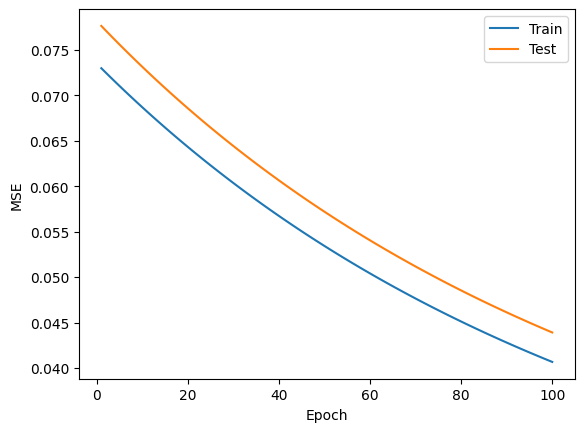

In [ ]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(18, 64)
        self.fc2 = nn.Linear(64, 1)
        
    def forward(self, x):
        out = torch.relu(self.fc1(x))
        out = self.fc2(out)
        return out

# Create a neural network instance
net = Net()

# Define loss function and optimizer
criterion = nn.MSELoss()
# criterion = nn.L1Loss() # MAE
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

# Train the neural network
train_mse_list = []
test_mse_list = []
# train_mae_list = []
# test_mae_list = []

for epoch in range(100):
    # Forward pass
    train_outputs = net(X_train)
    train_loss = criterion(train_outputs, y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Calculate MSE on training set
    with torch.no_grad():
        train_mse = criterion(train_outputs, y_train)
        train_mse_list.append(train_mse.item())
        # train_mae = criterion(train_outputs, y_train)
        # train_mae_list.append(train_mae.item())
        
        # Calculate MSE on test set
        test_outputs = net(X_test)
        test_mse = criterion(test_outputs, y_test)
        test_mse_list.append(test_mse.item())
        # test_mae = criterion(test_outputs, y_test)
        # test_mae_list.append(test_mae.item())

    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'.format(epoch+1, 1000, train_loss.item(), test_mse.item()))
        # print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'.format(epoch+1, 1000, train_loss.item(), test_mae.item()))

# Plot the MSE change over epochs for training and testing data
plt.plot(range(1, len(train_mse_list)+1), train_mse_list, label='Train')
plt.plot(range(1, len(test_mse_list)+1), test_mse_list, label='Test')
# plt.plot(range(1, len(train_mae_list)+1), train_mae_list, label='Train')
# plt.plot(range(1, len(test_mae_list)+1), test_mae_list, label='Test')
plt.xlabel('Epoch')
plt.ylabel('MSE')
# plt.ylabel('MAE')
plt.legend()
plt.show()

### Model 2 - RNN model

Epoch [10/1000], Train Loss: 0.0471, Test Loss: 0.0083
Epoch [20/1000], Train Loss: 0.0318, Test Loss: 0.0064
Epoch [30/1000], Train Loss: 0.0217, Test Loss: 0.0051
Epoch [40/1000], Train Loss: 0.0151, Test Loss: 0.0043
Epoch [50/1000], Train Loss: 0.0107, Test Loss: 0.0037
Epoch [60/1000], Train Loss: 0.0079, Test Loss: 0.0034
Epoch [70/1000], Train Loss: 0.0059, Test Loss: 0.0031
Epoch [80/1000], Train Loss: 0.0047, Test Loss: 0.0030
Epoch [90/1000], Train Loss: 0.0039, Test Loss: 0.0028
Epoch [100/1000], Train Loss: 0.0033, Test Loss: 0.0028


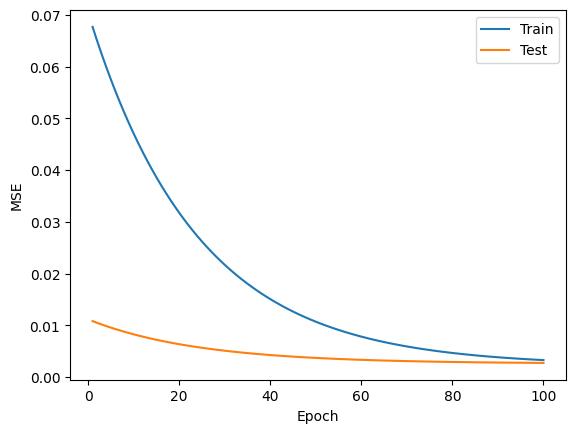

In [ ]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.rnn = nn.RNN(input_size=18, hidden_size=32, num_layers=2, batch_first=True)
        self.fc = nn.Linear(32, 1)
        
    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# Create a neural network instance
net = Net()

# Define loss function and optimizer
criterion = nn.MSELoss()
# criterion = nn.L1Loss() # MAE
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

# Train the neural network
train_mse_list = []
test_mse_list = []
# train_mae_list = []
# test_mae_list = []

for epoch in range(100):
    # Forward pass
    train_outputs = net(X_train.unsqueeze(0))
    train_loss = criterion(train_outputs.squeeze(), y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Calculate MSE on training set
    with torch.no_grad():
        train_mse = criterion(train_outputs.squeeze(), y_train)
        train_mse_list.append(train_mse.item())
        # train_mae = criterion(train_outputs.squeeze(), y_train)
        # train_mae_list.append(train_mae.item())
        
        # Calculate MSE on test set
        test_outputs = net(X_test.unsqueeze(0))
        test_mse = criterion(test_outputs.squeeze(), y_test)
        test_mse_list.append(test_mse.item())
        # test_mae = criterion(test_outputs.squeeze(), y_test)
        # test_mae_list.append(test_mae.item())

    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'.format(epoch+1, 1000, train_loss.item(), test_mse.item()))
        # print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'.format(epoch+1, 1000, train_loss.item(), test_mae.item()))

# Plot the MSE change over epochs for training and testing data
plt.plot(range(1, len(train_mse_list)+1), train_mse_list, label='Train')
plt.plot(range(1, len(test_mse_list)+1), test_mse_list, label='Test')
# plt.plot(range(1, len(train_mae_list)+1), train_mae_list, label='Train')
# plt.plot(range(1, len(test_mae_list)+1), test_mae_list, label='Test')
plt.xlabel('Epoch')
plt.ylabel('MSE')
# plt.ylabel('MAE')
plt.legend()
plt.show()

### Model 3 - BiRNN model

Epoch [10/1000], Train Loss: 0.2666, Test Loss: 0.0921
Epoch [20/1000], Train Loss: 0.1325, Test Loss: 0.0481
Epoch [30/1000], Train Loss: 0.0669, Test Loss: 0.0262
Epoch [40/1000], Train Loss: 0.0345, Test Loss: 0.0151
Epoch [50/1000], Train Loss: 0.0184, Test Loss: 0.0093
Epoch [60/1000], Train Loss: 0.0103, Test Loss: 0.0063
Epoch [70/1000], Train Loss: 0.0063, Test Loss: 0.0048
Epoch [80/1000], Train Loss: 0.0043, Test Loss: 0.0039
Epoch [90/1000], Train Loss: 0.0033, Test Loss: 0.0034
Epoch [100/1000], Train Loss: 0.0028, Test Loss: 0.0032


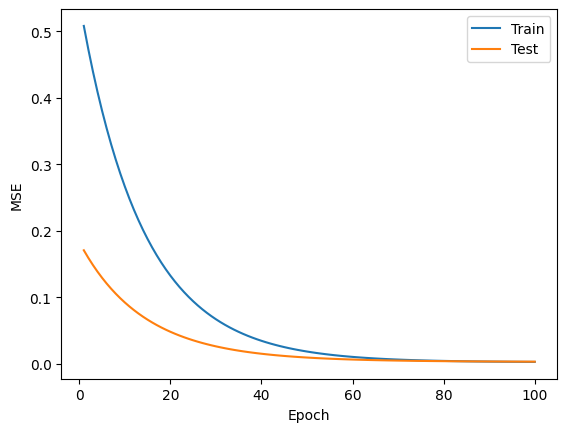

In [ ]:
# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.rnn = nn.RNN(input_size=18, hidden_size=32, num_layers=2, batch_first=True, bidirectional=True)
        self.fc = nn.Linear(64, 1)
        
    def forward(self, x):
        out, _ = self.rnn(x)
        out = self.fc(out[:, -1, :])
        return out

# Create a neural network instance
net = Net()

# Define loss function and optimizer
criterion = nn.MSELoss()
# criterion = nn.L1Loss() # MAE
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

# Train the neural network
train_mse_list = []
test_mse_list = []
# train_mae_list = []
# test_mae_list = []

for epoch in range(100):
    # Forward pass
    train_outputs = net(X_train.unsqueeze(0))
    train_loss = criterion(train_outputs.squeeze(), y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    # Calculate MSE on training set
    with torch.no_grad():
        train_mse = criterion(train_outputs.squeeze(), y_train)
        train_mse_list.append(train_mse.item())
        # train_mae = criterion(train_outputs.squeeze(), y_train)
        # train_mae_list.append(train_mae.item())
        
        # Calculate MSE on test set
        test_outputs = net(X_test.unsqueeze(0))
        test_mse = criterion(test_outputs.squeeze(), y_test)
        test_mse_list.append(test_mse.item())
        # test_mae = criterion(test_outputs.squeeze(), y_test)
        # test_mae_list.append(test_mae.item())

    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'.format(epoch+1, 1000, train_loss.item(), test_mse.item()))
        # print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'.format(epoch+1, 1000, train_loss.item(), test_mae.item()))

# Plot the MSE change over epochs for training and testing data
plt.plot(range(1, len(train_mse_list)+1), train_mse_list, label='Train')
plt.plot(range(1, len(test_mse_list)+1), test_mse_list, label='Test')
# plt.plot(range(1, len(train_mae_list)+1), train_mae_list, label='Train')
# plt.plot(range(1, len(test_mae_list)+1), test_mae_list, label='Test')
plt.xlabel('Epoch')
plt.ylabel('MSE')
# plt.ylabel('MAE')
plt.legend()
plt.show()

## Model 4 - LSTM model

Epoch [10/1000], Train Loss: 0.0030, Test Loss: 0.0033
Epoch [20/1000], Train Loss: 0.0026, Test Loss: 0.0030
Epoch [30/1000], Train Loss: 0.0024, Test Loss: 0.0028
Epoch [40/1000], Train Loss: 0.0023, Test Loss: 0.0026
Epoch [50/1000], Train Loss: 0.0023, Test Loss: 0.0026
Epoch [60/1000], Train Loss: 0.0023, Test Loss: 0.0026
Epoch [70/1000], Train Loss: 0.0023, Test Loss: 0.0026
Epoch [80/1000], Train Loss: 0.0023, Test Loss: 0.0026
Epoch [90/1000], Train Loss: 0.0022, Test Loss: 0.0026
Epoch [100/1000], Train Loss: 0.0022, Test Loss: 0.0026


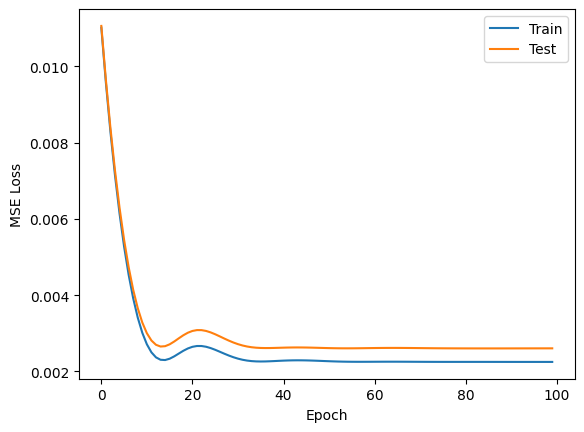

In [ ]:
# Convert data to PyTorch tensors
X_train_new = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
y_train_new = torch.tensor(y_train, dtype=torch.float32)
X_test_new = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
y_test_new = torch.tensor(y_test, dtype=torch.float32)

# Define LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])
        return out

# Initialize model
input_size = X_train_new.shape[2]
output_size = 1
hidden_size = 32
model = LSTM(input_size, hidden_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
# criterion = nn.L1Loss() # MAE
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# # Define r2 loss function
# def r2_loss(output, target):
#     target_mean = torch.mean(target)
#     ss_tot = torch.sum((target - target_mean) ** 2)
#     ss_res = torch.sum((target - output) ** 2)
#     r2 = 1 - ss_res / ss_tot
#     return r2

# Train model
epochs = 100
train_loss = []
test_loss = []
for i in range(epochs):
    # Forward pass and loss calculation
    y_pred_train = model(X_train_new)
    loss_train = criterion(y_pred_train, y_train_new)
    # loss_train = r2_loss(y_pred_train, y_train_new)
    y_pred_test = model(X_test_new)
    loss_test = criterion(y_pred_test, y_test_new)
    # loss_test = r2_loss(y_pred_test, y_test_new)
    train_loss.append(loss_train.item())
    test_loss.append(loss_test.item())
    
    # Backward pass and parameter update
    optimizer.zero_grad()
    loss_train.backward()
    optimizer.step()
    
    # Print loss at each epoch
    if (i+1) % 10 == 0:
        print('Epoch [{}/{}], Train Loss: {:.4f}, Test Loss: {:.4f}'.format(i+1, 1000, loss_train, loss_test))

# Plot MSE change
plt.plot(train_loss, label='Train')
plt.plot(test_loss, label='Test')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
# plt.ylabel('MAE Loss')
# plt.ylabel('R-Squared Loss')
plt.legend()
plt.show()

## Model 5 - Seq2Seq Model

Epoch [10/1000], Training Loss: 0.0039, Test Loss: 0.0036
Epoch [20/1000], Training Loss: 0.0027, Test Loss: 0.0031
Epoch [30/1000], Training Loss: 0.0023, Test Loss: 0.0026
Epoch [40/1000], Training Loss: 0.0023, Test Loss: 0.0026
Epoch [50/1000], Training Loss: 0.0023, Test Loss: 0.0026
Epoch [60/1000], Training Loss: 0.0023, Test Loss: 0.0026
Epoch [70/1000], Training Loss: 0.0022, Test Loss: 0.0026
Epoch [80/1000], Training Loss: 0.0022, Test Loss: 0.0026
Epoch [90/1000], Training Loss: 0.0022, Test Loss: 0.0026
Epoch [100/1000], Training Loss: 0.0022, Test Loss: 0.0026


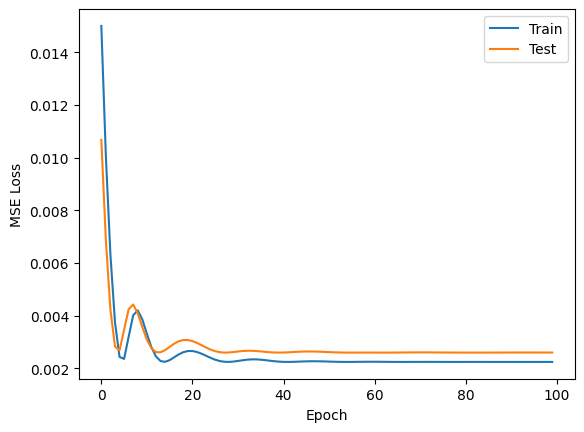

In [ ]:
import torch
import torch.nn as nn

# Define the seq2seq model
class Seq2Seq(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(Seq2Seq, self).__init__()
        self.hidden_dim = hidden_dim
        self.encoder = nn.LSTM(input_dim, hidden_dim)
        self.decoder = nn.LSTM(1, hidden_dim)
        self.linear = nn.Linear(hidden_dim, output_dim)

    def forward(self, input_seq, target_seq):
        # Encode the input sequence
        _, hidden_state = self.encoder(input_seq)

        # Decode the target sequence
        output_seq, _ = self.decoder(target_seq, hidden_state)

        # Apply linear layer to get the output sequence
        output_seq = self.linear(output_seq)

        return output_seq

# Define the model hyperparameters
input_dim = X_train.shape[1]
hidden_dim = 128
output_dim = 1
learning_rate = 0.001
num_epochs = 100

train_loss_ls = []
test_loss_ls = []

# Create the model and optimizer
model = Seq2Seq(input_dim, hidden_dim, output_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Define the loss function
criterion = nn.MSELoss() #L2Loss
# criterion = nn.L1Loss() # MAE

# Define r2 loss function
# def r2_loss(output, target):
#     target_mean = torch.mean(target)
#     ss_tot = torch.sum((target - target_mean) ** 2)
#     ss_res = torch.sum((target - output) ** 2)
#     r2 = 1 - ss_res / ss_tot
#     return r2

# Train the model
for epoch in range(num_epochs):
    # Set the model to training mode
    model.train()

    # Reset the gradients
    optimizer.zero_grad()

    # Forward pass on training data
    train_target_seq = y_train[:-1].unsqueeze(-1)
    train_output_seq = model(X_train, train_target_seq)

    # Compute the training loss （MSE）
    train_loss = criterion(train_output_seq, y_train[1:])

    # train_loss = r2_loss(train_output_seq, y_train[1:])

    # Backward pass on training data
    train_loss.backward()

    train_loss_ls.append(train_loss.detach().numpy())

    # Update the parameters
    optimizer.step()

    # Compute the validation loss
    with torch.no_grad():
        # Set the model to evaluation mode
        model.eval()

        # Forward pass on validation data
        test_target_seq = y_test[:-1].unsqueeze(-1)
        test_output_seq = model(X_test, test_target_seq)

        # Compute the validation loss
        test_loss = criterion(test_output_seq, y_test[1:])
        # test_loss = r2_loss(test_output_seq, y_test[1:])

        test_loss_ls.append(test_loss.detach().numpy())

    # Print the loss every 100 epochs
    if (epoch+1) % 10 == 0:
        print('Epoch [{}/{}], Training Loss: {:.4f}, Test Loss: {:.4f}'.format(epoch+1, 1000, train_loss.item(), test_loss.item()))

# R-2, MSE, MAE: Predict loss, do backpropagation: update parameters that exist

# Plot MSE change
plt.plot(train_loss_ls, label='Train')
plt.plot(test_loss_ls, label='Test')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
# plt.ylabel('R-Squared Loss')
# plt.ylabel('MAE Loss')
plt.legend()
plt.show()